# Random Forest 2

In [1]:
# pip install pydot

### Import libraries

In [2]:
import datetime
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

### Load data

In [3]:
# Read data from file into dataframe
features = pd.read_csv('data/temps.csv')
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


#### Data columns
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the month
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average

In [4]:
# Weather data for 348 days
features.shape

(348, 9)

In [5]:
# Display descriptive statistics
round(features.describe(), 2)

,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.00,348.00,348.00,348.00,348.00,348.00,348.00
mean,2016.0,6.48,15.51,62.51,62.56,59.76,62.54,60.03
std,0.0,3.50,8.77,11.81,11.77,10.53,11.79,15.63
min,2016.0,1.00,1.00,35.00,35.00,45.10,35.00,28.00
25%,2016.0,3.00,8.00,54.00,54.00,49.98,54.00,47.75
50%,2016.0,6.00,15.00,62.50,62.50,58.20,62.50,60.00
75%,2016.0,10.00,23.00,71.00,71.00,69.03,71.00,71.00
max,2016.0,12.00,31.00,92.00,92.00,77.40,92.00,95.00


### Data preparation

In [6]:
# Convert categorical features into numeric (non-ordinal) values
features = pd.get_dummies(features)
features.head()

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [7]:
features.shape

(348, 15)

In [8]:
# Define labels (values we want to predict)
labels = np.array(features['actual'])

# Remove labels from features
features = features.drop('actual', axis = 1)

# Save feature names for later use
feature_list = list(features.columns)

# Convert dataframe to numpy array
features = np.array(features)

In [9]:
# Split data into training and testing sets (75%/25%)
train_features, test_features, train_labels, test_labels = \
    train_test_split(features, labels, test_size = 0.25, random_state = 42)

### Establish baseline

In [10]:
# Save baseline predictions (historical averages)
baseline_preds = test_features[:, feature_list.index('average')]

# Calculate baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
avg_baseline_error = round(np.mean(baseline_errors), 3)
print('Average baseline error: ', avg_baseline_error, 'degrees.')

Average baseline error:  5.06 degrees.


### Train random forest model

In [11]:
# Instantiate model.  n = # of trees in the forest
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train model on training data
rf.fit(train_features, train_labels);

In [12]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print average model error (mean absolute error = mae)
avg_model_error = round(np.mean(errors), 3)
print('Average model error:', avg_model_error, 'degrees.')

Average model error: 3.833 degrees.


In [13]:
# Compare to baseline
improvement_baseline = 100 * abs(np.mean(errors) - np.mean(baseline_errors)) / np.mean(baseline_errors)
print('Improvement over baseline (degrees):', round(abs(avg_baseline_error - avg_model_error), 3), 'degrees.')
print('Improvement over baseline (%):', round(improvement_baseline, 2), '%.')

Improvement over baseline (degrees): 1.227 degrees.
Improvement over baseline (%): 24.24 %.


In [14]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Model accuracy:', round(accuracy, 2), '%.')

Model accuracy: 93.99 %.


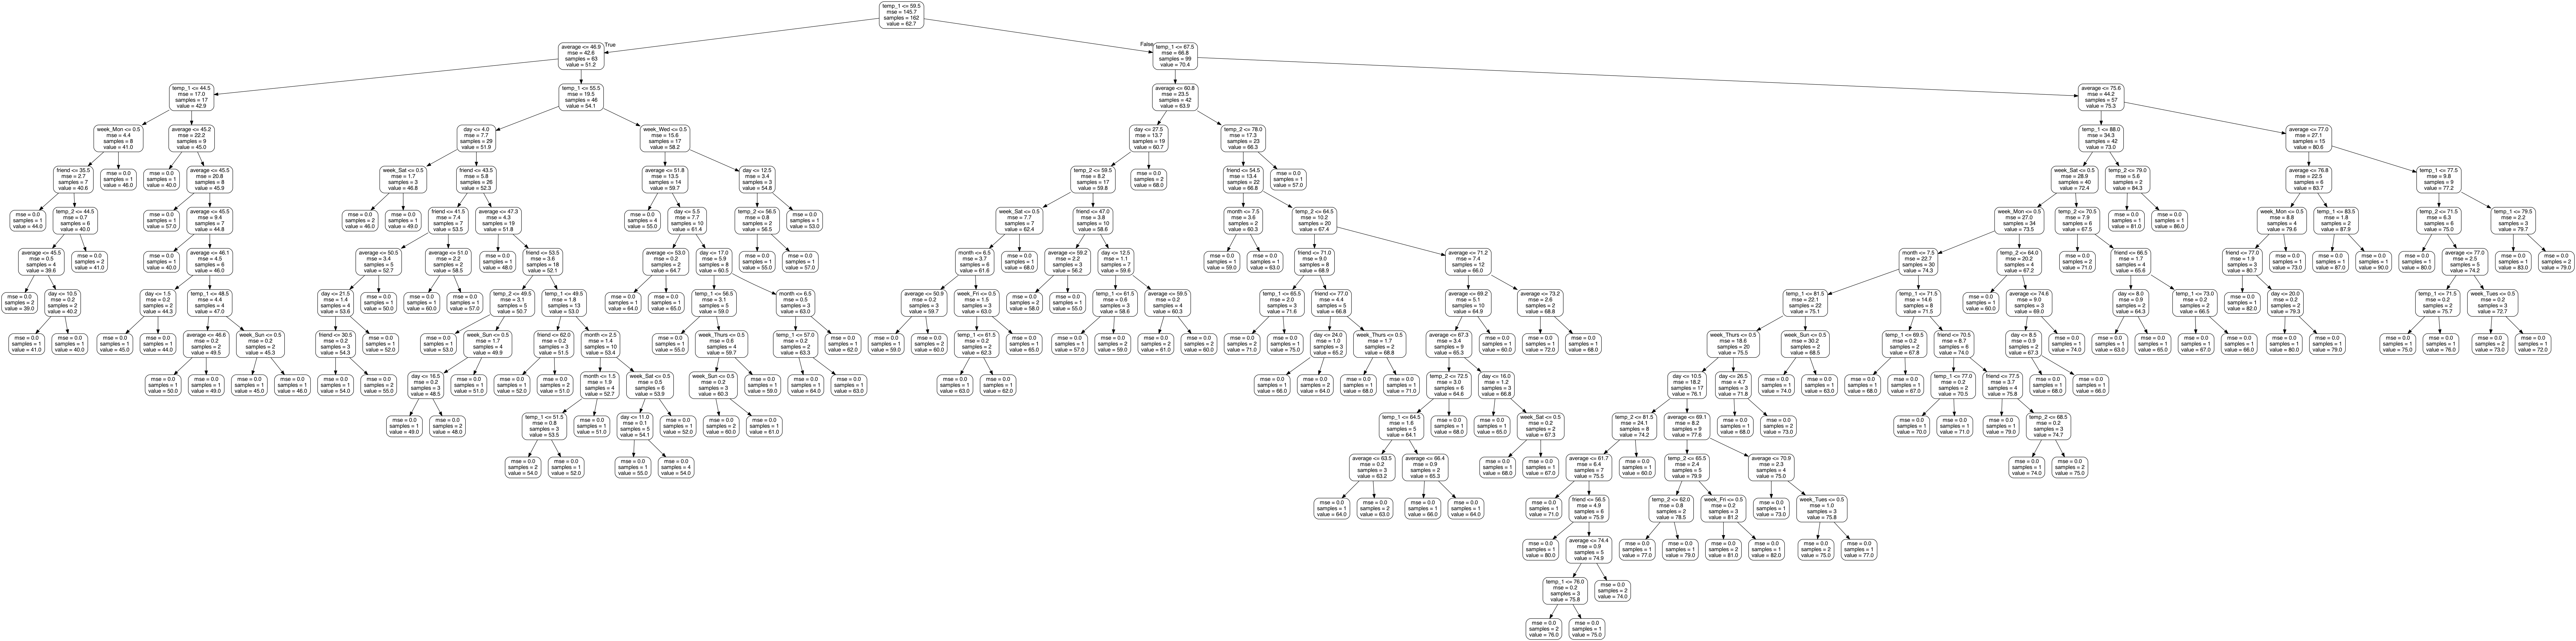

In [15]:
# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'images/RF_2.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('images/RF_2.dot')

# Write graph to a png file
graph.write_png('images/RF_2.png');

# Display png file
Image(filename='images/RF_2.png') 

In [16]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 15


### Train new smaller random forest model

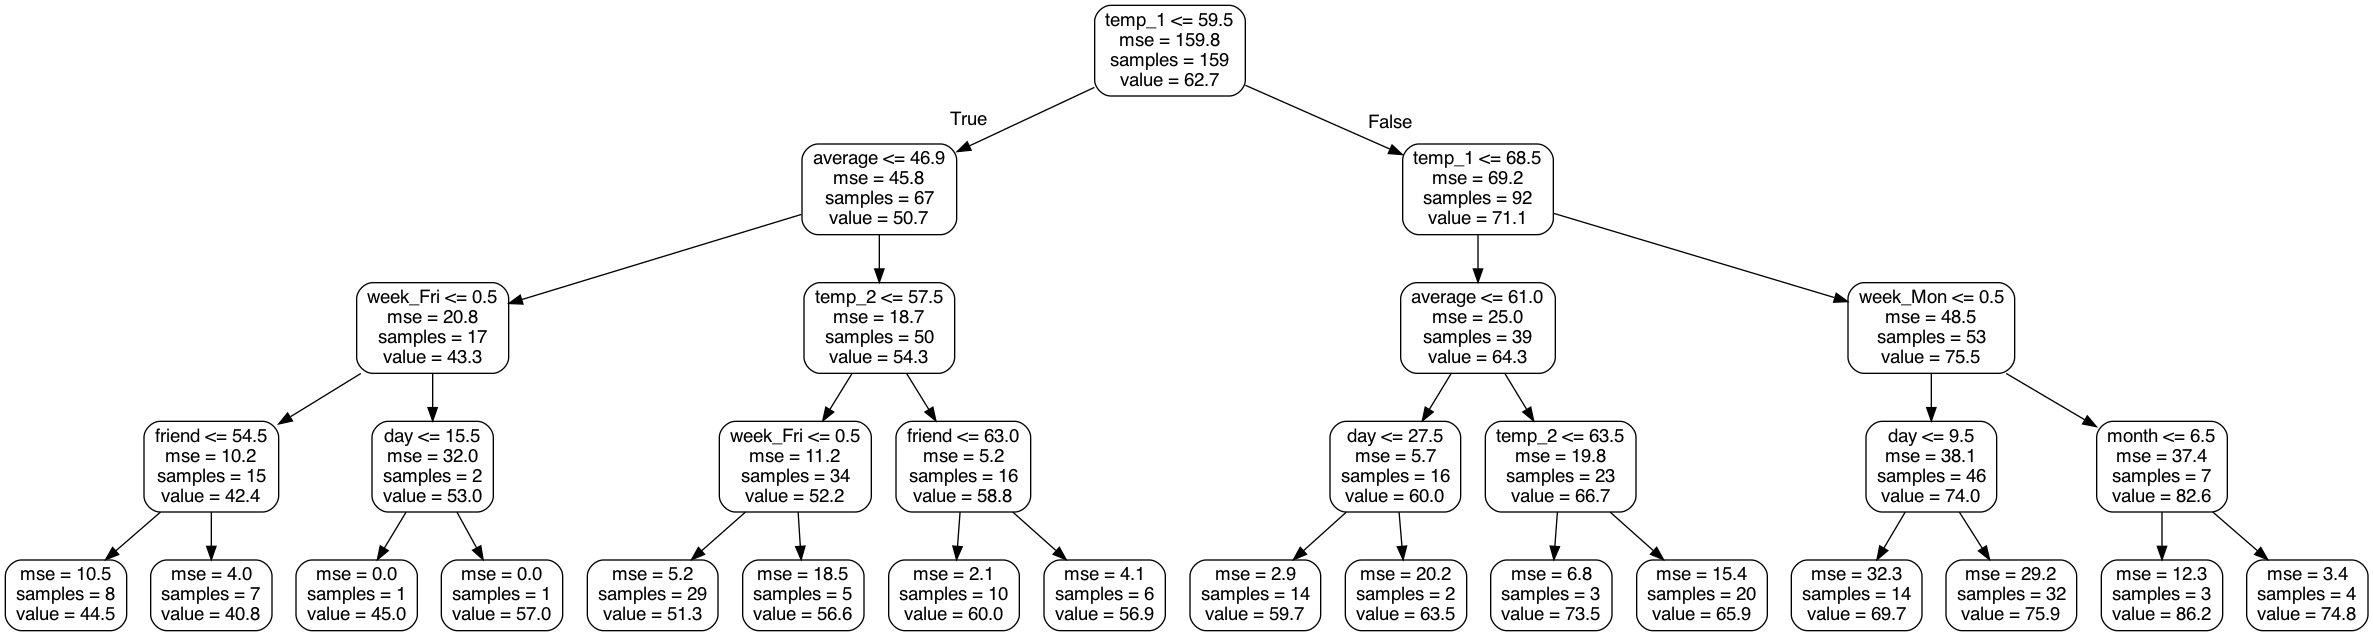

In [17]:
# Generate smaller forest.  Limit # trees to 10 and max tree depth to 4 levels.
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 4, random_state=42)
rf_small.fit(train_features, train_labels)

# Extract a small tree
tree_small = rf_small.estimators_[7]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'images/RF_2_small_2.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('images/RF_2_small_2.dot')
graph.write_png('images/RF_2_small_2.png')

# Display png file
Image(filename='images/RF_2_small_2.png') 

In [18]:
print('The depth of this tree is:', tree_small.tree_.max_depth)

The depth of this tree is: 4


In [19]:
# Use the forest's predict method on the test data
predictions = rf_small.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print average model error (mean absolute error - mae)
print('Average (small) model error:', round(np.mean(errors), 3), 'degrees.')

# Compare to baseline
improvement_baseline = 100 * abs(np.mean(errors) - np.mean(baseline_errors)) / np.mean(baseline_errors)
print('(Small model) improvement over baseline:', round(improvement_baseline, 2), '%.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('(Small model) accuracy:', round(accuracy, 2), '%.')

Average (small) model error: 4.072 degrees.
(Small model) improvement over baseline: 19.53 %.
(Small model) accuracy: 93.57 %.


### Compare metrics with original model
* Average model error: 3.833 degrees.
* Improvement over baseline: 24.24 %.
* Accuracy: 93.99 %.

### Train new random forest model with fewer features but same hyperparameters (# of trees, max tree depth) as original model

In [20]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.7
Variable: average              Importance: 0.19
Variable: day                  Importance: 0.03
Variable: temp_2               Importance: 0.02
Variable: friend               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


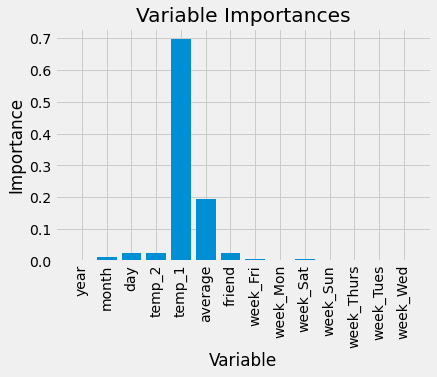

In [21]:
# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

In [22]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the two most important features
important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Display the performance metrics
print('Average (important features only) model error:', round(np.mean(errors), 3), 'degrees.')

# Compare to baseline
improvement_baseline = 100 * abs(np.mean(errors) - np.mean(baseline_errors)) / np.mean(baseline_errors)
print('(Important features only) improvement over baseline:', round(improvement_baseline, 2), '%.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('(Important features only) accuracy:', round(accuracy, 2), '%.')

Average (important features only) model error: 3.918 degrees.
(Important features only) improvement over baseline: 22.57 %.
(Important features only) accuracy: 93.77 %.
